In [1]:
pip install isodate

     |████████████████████████████████| 41 kB 168 kB/s 


In [1]:
from googleapiclient.discovery import build
import pandas as pd
import isodate
from IPython.display import JSON
from dateutil import parser
#fordatavisualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [19]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Surekha
[nltk_data]     Kandula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
api_key = #'Enter your API Key'

channel_ids = ['UC7IcJI8PUf5Z3zKxnZvTBog',#The School of Life
               'UCtYzVCmNxrshH4_bPO_-Y-A',#The Art of Improvement
               'UCtKSLA4sBvp4gU-NIGFEQgg',#Teach for life
               'UCX6b17PVsYBQ0ip5gyeme-Q',#CrashCourse
               'UCHnyfMqiRRG1u-2MsSQLbXA',#Veritasium
               'UCtYzVCmNxrshH4_bPO_-Y-A',#The Art of Improvement
               'UCRYWXmj4j_1rwuCq0h8v69Q',#Evolved Teachings
               'UC-RKpEc4eE9PwJaupN91xYQ',#Sprouts
               'UCLXo7UDZvByw2ixzpQCufnA',#Vox
               'UCxlJ45KjG4XVcQ_hd8j227A',#Peekaboo Kidz 
               'UCTn0kzSoLyz6r6H-psXmgjA',#Fun Science
               'UCsooa4yRKGN_zEE8iknghZA',#TED-ED
               'UCpExuV8qJMfCaSQNL1YG6bQ',#Better Than Yesterday
               'UCeiYXex_fwgYDonaTcSIk6w',#MinuteEarth
               'UCH4BNI0-FOK2dMXoFtViWHw',#Be Smart
               'UCC552Sd-3nyi_tk2BudLUzA',#AsapSCIENCE
               'UCIlU5KDHKFSaebYviKfOidw',#Newsthink
               'UC8butISFwT-Wl7EV0hUK0BQ',#freeCodeCamp.org
               'UCh9nVJoWXmFb7sLApWGcLPQ',#Code basics
               'UCWv7vMbMWH4-V0ZXdmDpPB',#Programming with mosh
               'UC8mWYDxedkJmUReAiA3ze9w',#English Fairy Tales
               'UClKKWBe2SCAEyv7ZNGhIe4g',#Orange
               'UCNU_lfiiWBdtULKOw6X0Di',#Krish Naik
               'UCtslD4DGH6PKyG_1gFAX7sg',#Alexander Amini
               'UCPPIsrNlEkaFQBk-4uNkOaw',#Hebbars
               'UC7rNzgC2fEBVpb-q_acpsmw',#Pepcoding
               'UC8butISFwT-Wl7EV0hUK0BQ',#FreeCode
               'UC_fFL5jgoCOrwAVoM_fBYwA',#Alex
               'UC0RhatS1pyxInC00YKjjBqQ',#Geeks
               'UCWv7vMbMWH4-V0ZXdmDpPBA',#Programming
               'UC4SVo0Ue36XCfOyb5Lh1viQ',#Bro Code
               'UCCktnahuRFYIBtNnKT5IYyg',#Intellipaat
               'UCliSQfmvqSQVc-ue1XV2pbw',#Survival Beast
               'UCzK4g-JcQLXsn_o0ZSXyuQQ',#automationfirst
               'UCUxrhFOaK6-xPidjlQ3Shnw',#kids learning for life
               'UCCezIgC97PvUuR4_gbFUs5g', # Corey Schafer
               'UCfzlCWGWYyIQ0aLC5w48gBQ', # Sentdex
               'UCNU_lfiiWBdtULKOw6X0Dig', # Krish Naik
               'UCzL_0nIe8B4-7ShhVPfJkgw', # DatascienceDoJo
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # Luke Barousse 
               'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the analyst

               ]
               
youtube = build('youtube', 'v3', developerKey=api_key)



In [21]:
def get_channel_stats(youtube, channel_ids):
    """
    Get channel statistics: title, subscriber count, view count, video count, upload playlist
    Params:
    
    youtube: the build object from googleapiclient.discovery
    channels_ids: list of channel IDs
    
    Returns:
    Dataframe containing the channel statistics for all channels in the provided list: title, subscriber count, view count, video count, upload playlist
    
    """
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    print(response)
    
    for i in range(len(response['items'])):
        data = dict(channelName = response['items'][i]['snippet']['title'],
                    subscribers = response['items'][i]['statistics']['subscriberCount'],
                    views = response['items'][i]['statistics']['viewCount'],
                    totalVideos = response['items'][i]['statistics']['videoCount'],
                    playlistId = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return pd.DataFrame(all_data)

def get_video_ids(youtube, playlist_id):
    """
    Get list of video IDs of all videos in the given playlist
    Params:
    
    youtube: the build object from googleapiclient.discovery
    playlist_id: playlist ID of the channel
    
    Returns:
    List of video IDs of all videos in the playlist
    
    """
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

def get_video_details(youtube, video_ids):
    """
    Get video statistics of all videos with given IDs
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with statistics of videos, i.e.:
        'channelTitle', 'title', 'description', 'tags', 'publishedAt'
        'viewCount', 'likeCount', 'favoriteCount', 'commentCount'
        'duration', 'definition', 'caption'
    """
        
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
        return pd.DataFrame(all_video_info)


def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with video IDs and associated top level comment in text.
    
    """
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part="snippet,replies",
                videoId=video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments) 

In [22]:
channel_data = get_channel_stats(youtube, channel_ids)

{'kind': 'youtube#channelListResponse', 'etag': '2enw9Be38mDfg6quPqXKRMwzQ1o', 'pageInfo': {'totalResults': 37, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'oiRiewimcGHUlMnHsYYGYjw3Px4', 'id': 'UCfzlCWGWYyIQ0aLC5w48gBQ', 'snippet': {'title': 'sentdex', 'description': 'Python Programming tutorials, going further than just the basics. Learn about machine learning, finance, data analysis, robotics, web development, game development and more.\n\nI have ~1000 videos, all of which do not fit on the front page. Try searching on the channel page, or via https://pythonprogramming.net. If you cannot find something, just ask! \n\nBitcoin donations: 1GV7srgR4NJx4vrk7avCmmVQQrqmv87ty6\nPaypal donations: HSKinsley@gmail.com', 'customUrl': 'sentdex', 'publishedAt': '2012-12-16T20:49:11Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/ytc/AKedOLS4PrPaM3XUymase4vM38wnsSYY803EreFCHVoatg=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://

In [23]:
channel_data

,channelName,subscribers,views,totalVideos,playlistId
0,sentdex,1130000,103060277,1251,UUfzlCWGWYyIQ0aLC5w48gBQ
1,CrashCourse,13500000,1690881299,1430,UUX6b17PVsYBQ0ip5gyeme-Q
2,Orange Data Mining,26200,2735238,41,UUlKKWBe2SCAEyv7ZNGhIe4g
3,MinuteEarth,2700000,401713746,300,UUeiYXex_fwgYDonaTcSIk6w
4,Better Than Yesterday,1850000,74902238,91,UUpExuV8qJMfCaSQNL1YG6bQ
5,Sprouts,1250000,85718072,110,UU-RKpEc4eE9PwJaupN91xYQ
6,Evolved Teachings,7680,372265,51,UURYWXmj4j_1rwuCq0h8v69Q
7,Kids Learning for Life,4630,214870,198,UUUxrhFOaK6-xPidjlQ3Shnw
8,Automation First,19300,876698,82,UUzK4g-JcQLXsn_o0ZSXyuQQ
9,Luke Barousse,189000,9228902,77,UULLw7jmFsvfIVaUFsLs8mlQ


In [24]:
# Convert count columns to numeric columns
numeric_cols = ['subscribers', 'views', 'totalVideos']
channel_data[numeric_cols] = channel_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

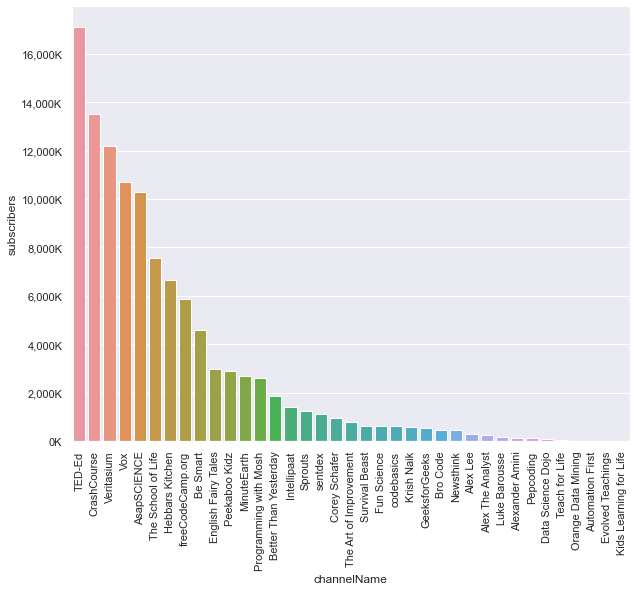

In [26]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channelName', y='subscribers', data=channel_data.sort_values('subscribers', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

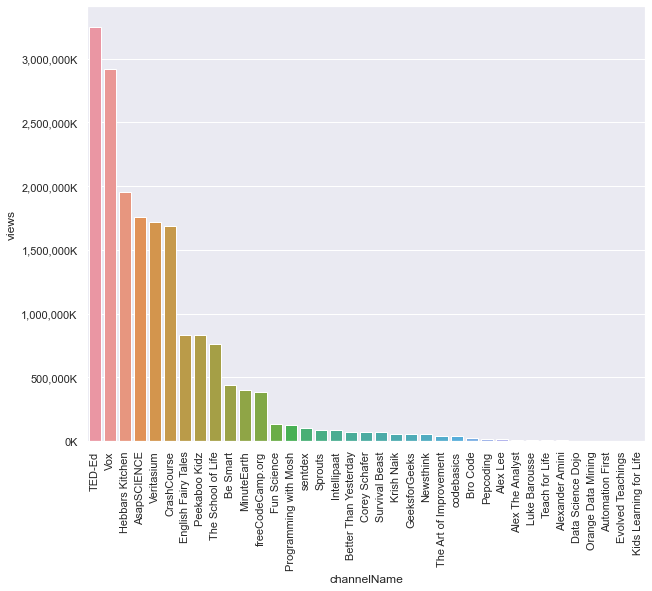

In [27]:
ax = sns.barplot(x='channelName', y='views', data=channel_data.sort_values('views', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

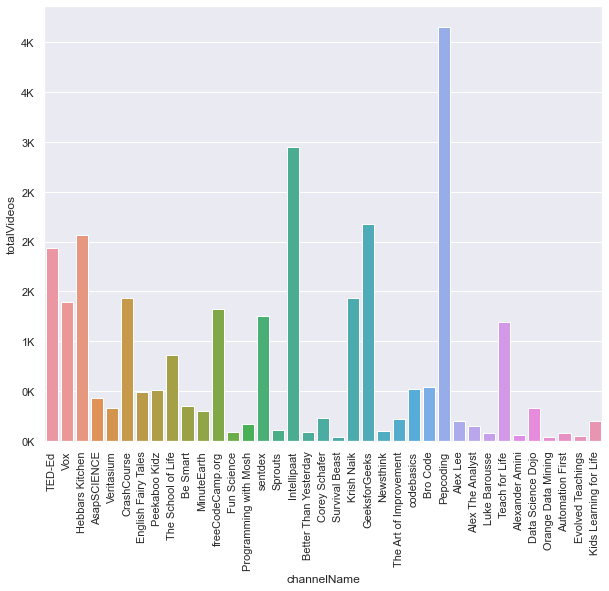

In [28]:
ax = sns.barplot(x='channelName', y='totalVideos', data=channel_data.sort_values('views', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [29]:
# Create a dataframe with video statistics 

video_df = pd.DataFrame()

for c in channel_data['channelName'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data['channelName']== c, 'playlistId'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)

    # get video data
    video_data = get_video_details(youtube, video_ids)
    
    # append video data together and comment data toghether
    video_df = video_df.append(video_data, ignore_index=True)

Getting video information from channel: sentdex
Getting video information from channel: CrashCourse
Getting video information from channel: Orange Data Mining
Getting video information from channel: MinuteEarth
Getting video information from channel: Better Than Yesterday
Getting video information from channel: Sprouts
Getting video information from channel: Evolved Teachings
Getting video information from channel: Kids Learning for Life
Getting video information from channel: Automation First
Getting video information from channel: Luke Barousse
Getting video information from channel: Alexander Amini
Getting video information from channel: Bro Code
Getting video information from channel: TED-Ed
Getting video information from channel: Teach for Life
Getting video information from channel: Alex Lee
Getting video information from channel: English Fairy Tales
Getting video information from channel: Intellipaat
Getting video information from channel: GeeksforGeeks
Getting video information

In [30]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,BVWmstt0AWM,sentdex,Home Lab Build - P.2 - Rack has evolved!,"Quite a few changes to the server rack, starti...","[python, programming]",2022-07-01T14:40:12Z,49270,1565,None,98,PT11M21S,hd,false
1,CIQ20FWs478,sentdex,Home Lab Build - P.1 - Building a NAS,My home lab journey. \n\nPart 2: https://youtu...,"[python, programming]",2022-06-15T13:27:20Z,31571,1182,None,89,PT17M7S,hd,false
2,P-yxB3muUmM,sentdex,Python Plays GTA V: Reboot - Announcement,Live self-driving car model training: https://...,"[python, programming]",2022-05-03T15:09:23Z,35990,1635,None,86,PT7M48S,hd,false
3,q59wap1ELQ4,sentdex,A. I. Learns to Play Starcraft 2 (Reinforcemen...,Tinkering with reinforcement learning via Stab...,"[python, programming, starcraft 2, AI, reinfor...",2022-04-23T15:05:05Z,377452,9630,None,286,PT17M42S,hd,true
4,LQvRhQwDOm0,sentdex,Better tracking for your deep learning trainin...,Introduction and overview of Weights and Biase...,"[python, programming]",2022-03-23T15:50:54Z,23471,498,None,39,PT21M15S,hd,false


In [31]:
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt']).dt.date
video_df['viewCount'] = pd.to_numeric(video_df['viewCount'])
video_df['likeCount'] = pd.to_numeric(video_df['likeCount'])
video_df['favouriteCount'] = pd.to_numeric(video_df['favouriteCount'])
video_df['commentCount'] = pd.to_numeric(video_df['commentCount'])

In [32]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,BVWmstt0AWM,sentdex,Home Lab Build - P.2 - Rack has evolved!,"Quite a few changes to the server rack, starti...","[python, programming]",2022-07-01,49270.0,1565.0,NaN,98.0,PT11M21S,hd,false
1,CIQ20FWs478,sentdex,Home Lab Build - P.1 - Building a NAS,My home lab journey. \n\nPart 2: https://youtu...,"[python, programming]",2022-06-15,31571.0,1182.0,NaN,89.0,PT17M7S,hd,false
2,P-yxB3muUmM,sentdex,Python Plays GTA V: Reboot - Announcement,Live self-driving car model training: https://...,"[python, programming]",2022-05-03,35990.0,1635.0,NaN,86.0,PT7M48S,hd,false
3,q59wap1ELQ4,sentdex,A. I. Learns to Play Starcraft 2 (Reinforcemen...,Tinkering with reinforcement learning via Stab...,"[python, programming, starcraft 2, AI, reinfor...",2022-04-23,377452.0,9630.0,NaN,286.0,PT17M42S,hd,true
4,LQvRhQwDOm0,sentdex,Better tracking for your deep learning trainin...,Introduction and overview of Weights and Biase...,"[python, programming]",2022-03-23,23471.0,498.0,NaN,39.0,PT21M15S,hd,false


In [33]:
top10_videos = video_df.sort_values(by='viewCount', ascending=False).head(10)

In [17]:
top10_videos

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
1174,4Wrc4fHSCpw,Veritasium,These are the asteroids to worry about,Stephen Hawking thought an asteroid impact pos...,"[veritasium, science, physics]",2020-11-30,71825573.0,615045.0,NaN,30441.0,PT20M6S,hd,true
1156,094y1Z2wpJg,Veritasium,The Simplest Math Problem No One Can Solve - C...,The Collatz Conjecture is the simplest math pr...,"[veritasium, science, physics]",2021-07-30,27660304.0,735678.0,NaN,67659.0,PT22M9S,hd,true
1158,k5s1cMNTmGs,Veritasium,How a slinky falls in slow motion #shorts,This is not just true of slinkies - if you rel...,"[veritasium, science, physics]",2021-07-19,27527663.0,1253862.0,NaN,8981.0,PT42S,hd,true
1515,_uQrJ0TkZlc,Programming with Mosh,Python Tutorial - Python Full Course for Begin...,Python tutorial - Python full course for begin...,"[python tutorial, python, python for beginners...",2019-02-18,26260908.0,780254.0,NaN,48422.0,PT6H14M7S,hd,true
1165,qevIIQHrJZg,Veritasium,This Unstoppable Robot Could Save Your Life,"This robot has applications to archaeology, sp...","[veritasium, science, physics, vine robot, vin...",2021-04-16,25080728.0,356083.0,NaN,20147.0,PT14M30S,hd,true
1214,7hKGHn_3Zhw,Fun Science,20 AMAZING SCIENCE EXPERIMENTS!,20 AMAZING SCIENCE EXPERIMENTS! \n#Experiement...,"[science, experiments, 20 easy science experim...",2021-08-05,24455154.0,199850.0,NaN,0.0,PT10M57S,hd,false
1166,t-_VPRCtiUg,Veritasium,The Surprising Secret of Synchronization,How does order spontaneously arise out of chao...,"[veritasium, science, physics, Strogatz, sync,...",2021-03-31,19889736.0,524748.0,NaN,18405.0,PT20M58S,hd,true
1186,kTXTPe3wahc,Veritasium,Parallel Worlds Probably Exist. Here’s Why,The most elegant interpretation of quantum mec...,"[veritasium, science, physics, quantum mechani...",2020-03-06,19812523.0,475497.0,NaN,48039.0,PT20M,hd,false
1163,HeQX2HjkcNo,Veritasium,Math's Fundamental Flaw,Not everything that is true can be proven. Thi...,"[veritasium, science, physics]",2021-05-22,19591918.0,614168.0,NaN,45969.0,PT34M,hd,true
424,QEXrb6HBVuU,AsapSCIENCE,Harvesting Water Out Of Thin Air | Shut It Off...,Watch all the UnF**k it videos here:\nhttps://...,None,2021-10-26,19487799.0,NaN,NaN,3021.0,PT23M46S,hd,true


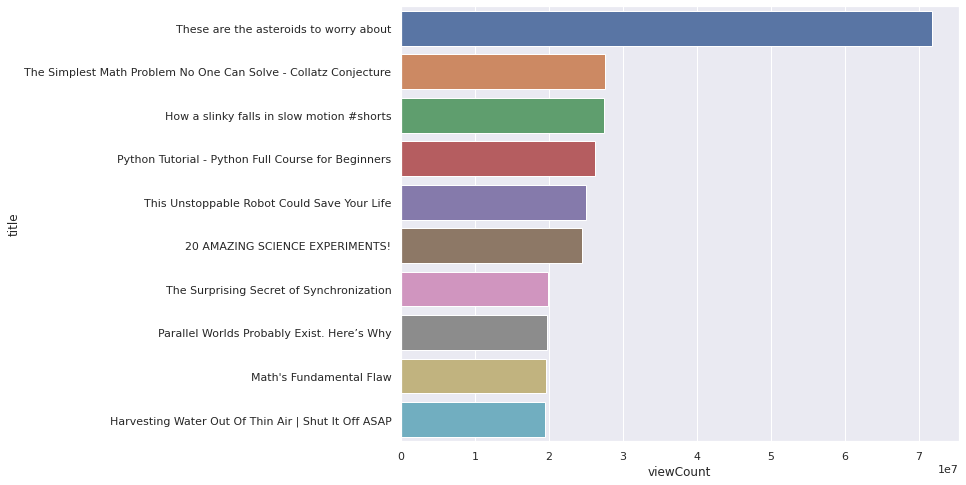

In [18]:
ax1 = sns.barplot(x='viewCount', y='title', data=top10_videos)

In [35]:
video_df['Month'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%b')
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,Month
0,BVWmstt0AWM,sentdex,Home Lab Build - P.2 - Rack has evolved!,"Quite a few changes to the server rack, starti...","[python, programming]",2022-07-01,49270.0,1565.0,NaN,98.0,PT11M21S,hd,false,Jul
1,CIQ20FWs478,sentdex,Home Lab Build - P.1 - Building a NAS,My home lab journey. \n\nPart 2: https://youtu...,"[python, programming]",2022-06-15,31571.0,1182.0,NaN,89.0,PT17M7S,hd,false,Jun
2,P-yxB3muUmM,sentdex,Python Plays GTA V: Reboot - Announcement,Live self-driving car model training: https://...,"[python, programming]",2022-05-03,35990.0,1635.0,NaN,86.0,PT7M48S,hd,false,May
3,q59wap1ELQ4,sentdex,A. I. Learns to Play Starcraft 2 (Reinforcemen...,Tinkering with reinforcement learning via Stab...,"[python, programming, starcraft 2, AI, reinfor...",2022-04-23,377452.0,9630.0,NaN,286.0,PT17M42S,hd,true,Apr
4,LQvRhQwDOm0,sentdex,Better tracking for your deep learning trainin...,Introduction and overview of Weights and Biase...,"[python, programming]",2022-03-23,23471.0,498.0,NaN,39.0,PT21M15S,hd,false,Mar


In [36]:
videos_per_month = video_df.groupby('Month', as_index=False).size()

In [21]:
videos_per_month

,Month,size
0,Apr,311
1,Aug,63
2,Dec,154
3,Feb,226
4,Jan,175
5,Jul,71
6,Jun,71
7,Mar,275
8,May,219
9,Nov,114


In [37]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [38]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [39]:
videos_per_month = videos_per_month.sort_index()

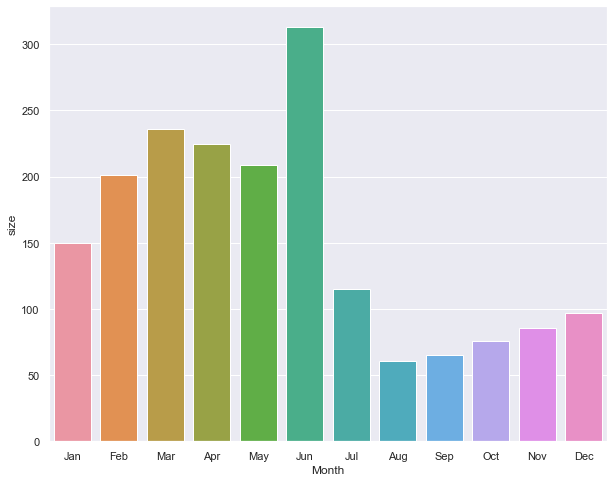

In [40]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [41]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount          True
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
Month             False
dtype: bool

In [42]:
video_df.publishedAt.sort_values().value_counts()

2022-04-22    14
2022-06-30    14
2022-06-29    13
2022-06-08    13
2022-04-21    13
              ..
2021-12-25     1
2020-10-15     1
2020-03-09     1
2019-07-31     1
2019-01-29     1
Name: publishedAt, Length: 694, dtype: int64

In [43]:
cols = ['viewCount', 'likeCount']
video_df[cols] = video_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [44]:
# Create publish day (in the week) column

#video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
#video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 
video_df['pushblishDayName'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%A')

In [45]:
# convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [46]:
# Add number of tags
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [47]:
# Comments and likes per 1000 view ratio
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
#video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [48]:
# Title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

In [49]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,Month,pushblishDayName,durationSecs,tagsCount,likeRatio,titleLength
0,BVWmstt0AWM,sentdex,Home Lab Build - P.2 - Rack has evolved!,"Quite a few changes to the server rack, starti...","[python, programming]",2022-07-01,49270.0,1565.0,NaN,98.0,PT11M21S,hd,false,Jul,Friday,681.0,2,31.763751,40
1,CIQ20FWs478,sentdex,Home Lab Build - P.1 - Building a NAS,My home lab journey. \n\nPart 2: https://youtu...,"[python, programming]",2022-06-15,31571.0,1182.0,NaN,89.0,PT17M7S,hd,false,Jun,Wednesday,1027.0,2,37.439422,37
2,P-yxB3muUmM,sentdex,Python Plays GTA V: Reboot - Announcement,Live self-driving car model training: https://...,"[python, programming]",2022-05-03,35990.0,1635.0,NaN,86.0,PT7M48S,hd,false,May,Tuesday,468.0,2,45.429286,41
3,q59wap1ELQ4,sentdex,A. I. Learns to Play Starcraft 2 (Reinforcemen...,Tinkering with reinforcement learning via Stab...,"[python, programming, starcraft 2, AI, reinfor...",2022-04-23,377452.0,9630.0,NaN,286.0,PT17M42S,hd,true,Apr,Saturday,1062.0,6,25.513178,57
4,LQvRhQwDOm0,sentdex,Better tracking for your deep learning trainin...,Introduction and overview of Weights and Biase...,"[python, programming]",2022-03-23,23471.0,498.0,NaN,39.0,PT21M15S,hd,false,Mar,Wednesday,1275.0,2,21.217673,77


C:\Users\Surekha Kandula\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


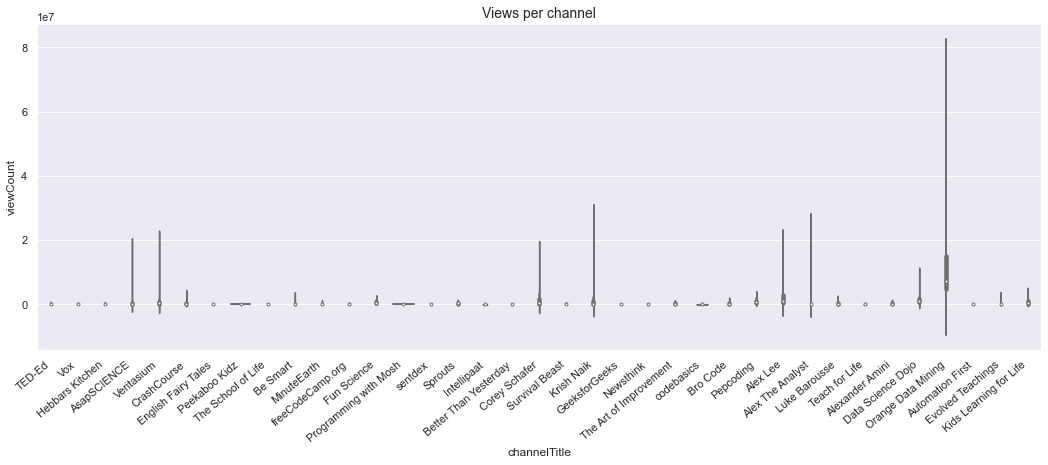

In [50]:
plt.rcParams['figure.figsize'] = (18, 6)
ax3 = sns.violinplot(video_df['channelTitle'], video_df['viewCount'], palette = 'pastel')
ax3.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Views per channel', fontsize = 14)
plt.show()

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

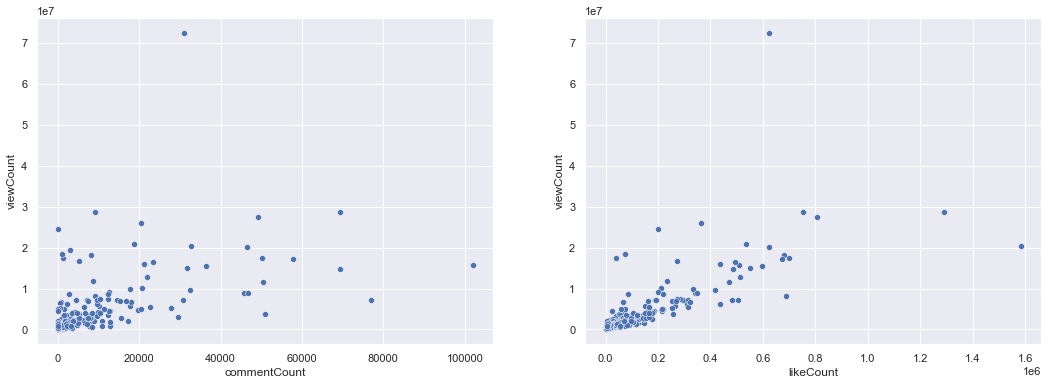

In [51]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1])

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

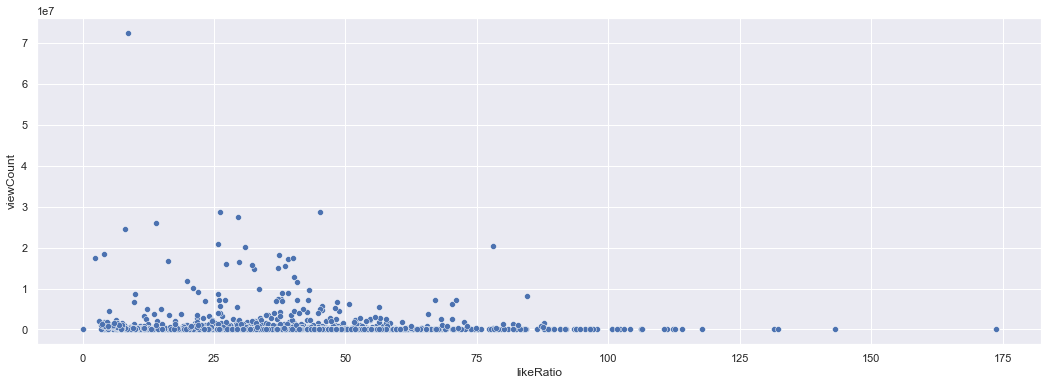

In [52]:
#fig, ax =plt.subplots(1,1)
sns.scatterplot(data = video_df, x = "likeRatio", y = "viewCount")

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

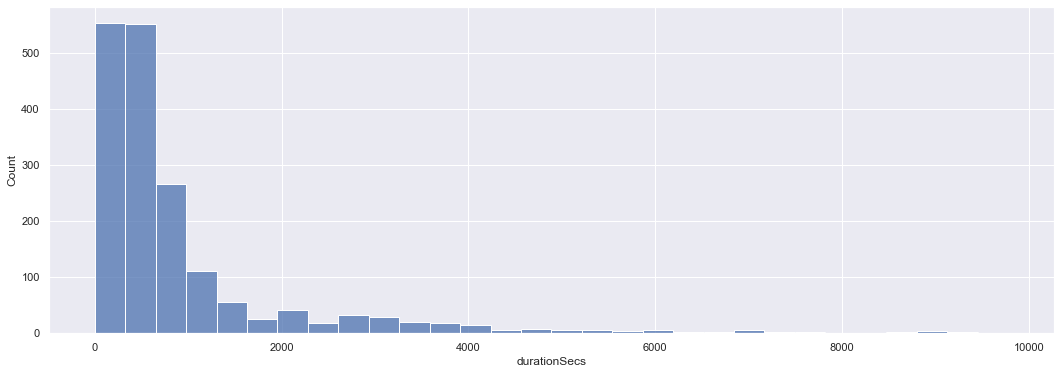

In [53]:
sns.histplot(data=video_df[video_df['durationSecs'] < 10000], x="durationSecs", bins=30)

<AxesSubplot:xlabel='durationSecs', ylabel='likeCount'>

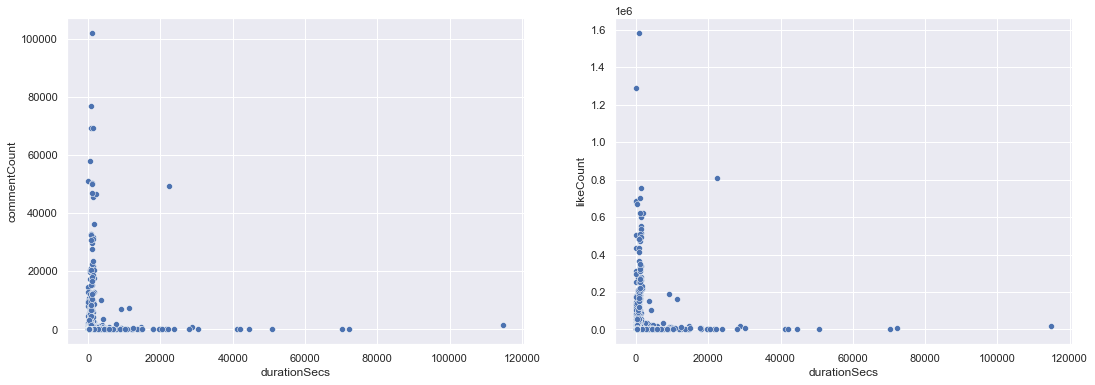

In [54]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "durationSecs", y = "likeCount", ax=ax[1])


<AxesSubplot:xlabel='titleLength', ylabel='viewCount'>

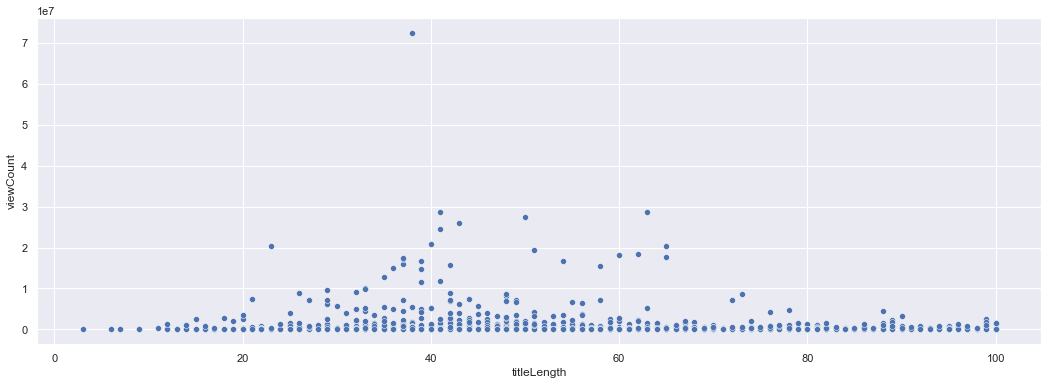

In [55]:
sns.scatterplot(data = video_df, x = "titleLength", y = "viewCount")

In [56]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

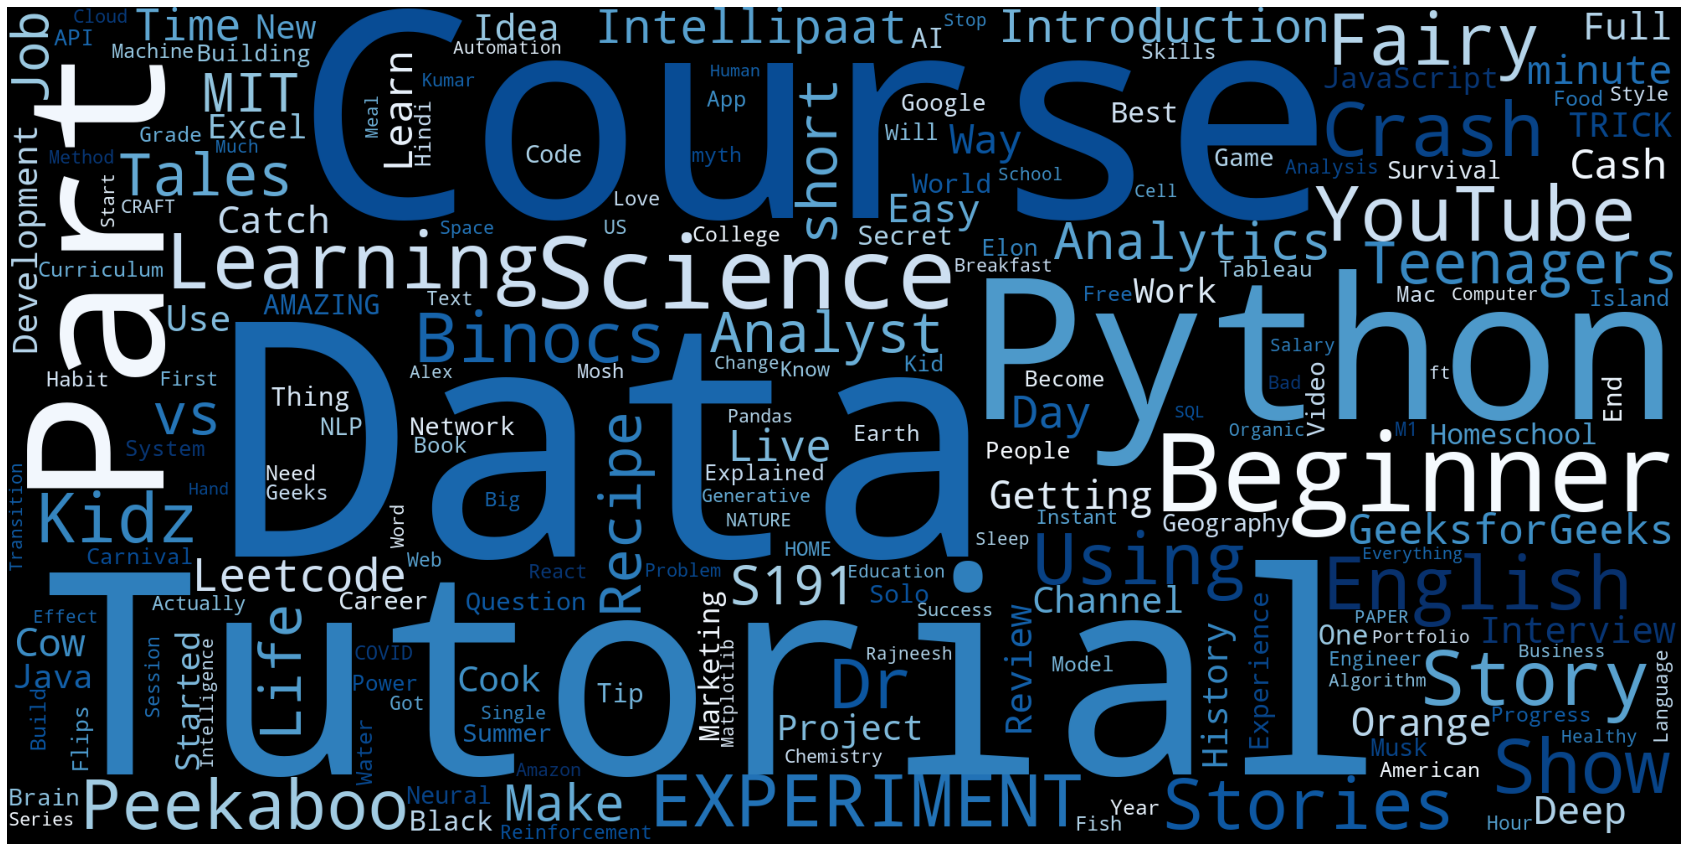

In [42]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='Blues', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

<AxesSubplot:xlabel='tagsCount', ylabel='viewCount'>

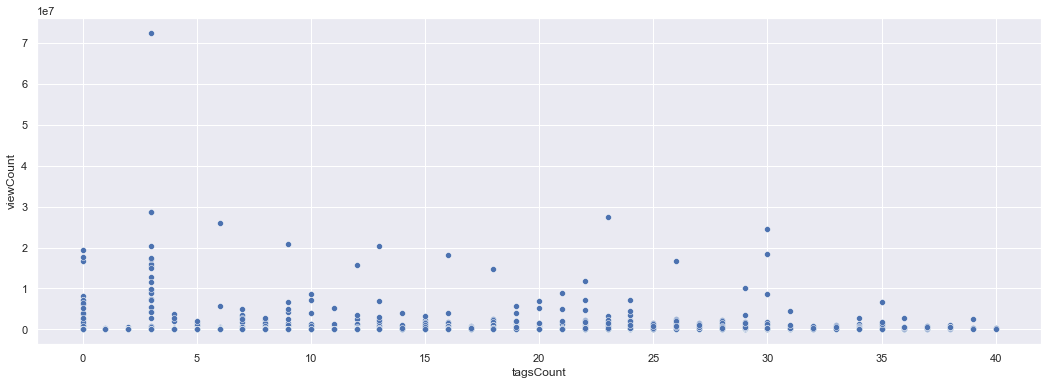

In [57]:
sns.scatterplot(data = video_df, x = "tagsCount", y = "viewCount")

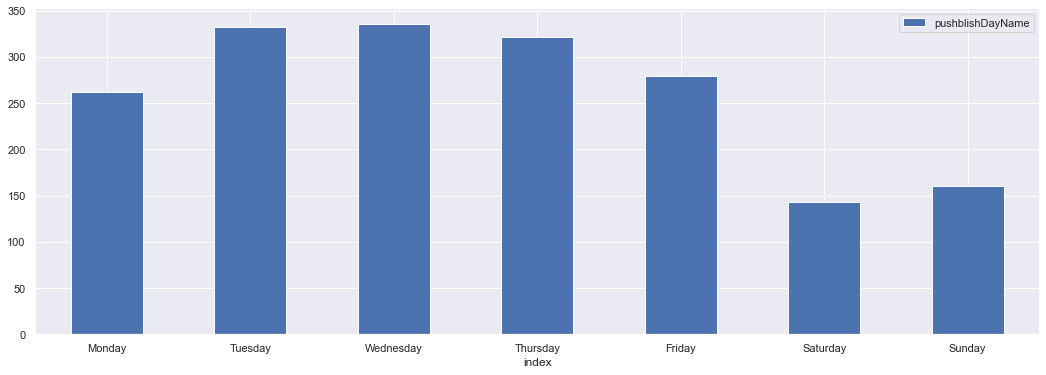

In [58]:
day_df = pd.DataFrame(video_df['pushblishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='pushblishDayName', rot=0)

In [59]:
video_df['Year'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%Y').astype(int)

In [60]:
video_df['Year']

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
1829    2022
1830    2022
1831    2022
1832    2021
1833    2021
Name: Year, Length: 1834, dtype: int32

In [61]:
videos_per_month_precovid = video_df[video_df['Year'] < 2020].groupby('Month', as_index=False).size()
videos_per_month_postcovid = video_df[video_df['Year'] > 2019 ].groupby('Month', as_index=False).size()

In [63]:
videos_per_month_precovid

,Month,size
0,Apr,16
1,Aug,7
2,Dec,15
3,Feb,20
4,Jan,10
5,Jul,8
6,Jun,17
7,Mar,14
8,May,9
9,Nov,17


In [64]:
videos_per_month_postcovid


,Month,size
0,Apr,209
1,Aug,54
2,Dec,82
3,Feb,181
4,Jan,140
5,Jul,107
6,Jun,296
7,Mar,222
8,May,200
9,Nov,69


In [65]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [66]:
videos_per_month_precovid.index = pd.CategoricalIndex(videos_per_month_precovid['Month'], categories=sort_order, ordered=True)

In [67]:
videos_per_month_postcovid.index = pd.CategoricalIndex(videos_per_month_postcovid['Month'], categories=sort_order, ordered=True)

In [68]:
videos_per_month_precovid = videos_per_month_precovid.sort_index()

In [69]:
videos_per_month_postcovid = videos_per_month_postcovid.sort_index()

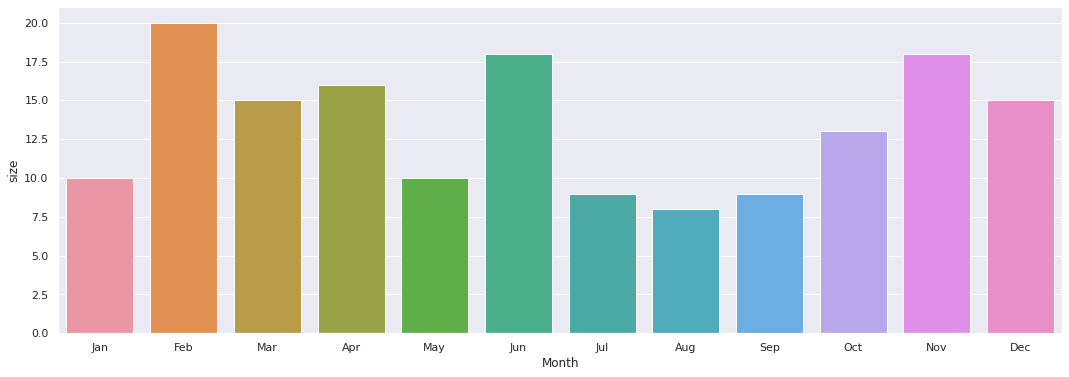

In [56]:
pre_covid_graph = sns.barplot(x='Month', y='size', data=videos_per_month_precovid)

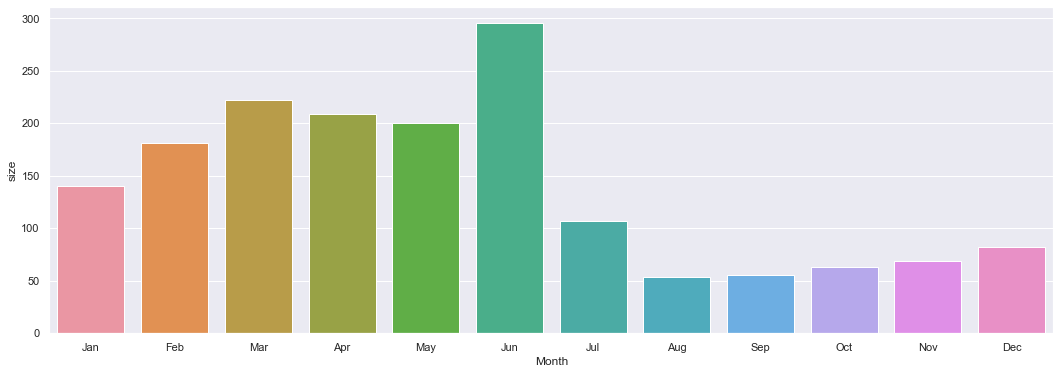

In [70]:
post_covid_graph = sns.barplot(x='Month', y='size', data=videos_per_month_postcovid)

<AxesSubplot:ylabel='size'>

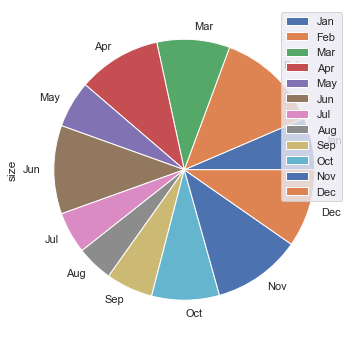

In [71]:
videos_per_month_precovid.plot(kind='pie', y='size', labels = videos_per_month_precovid['Month'])

<AxesSubplot:ylabel='size'>

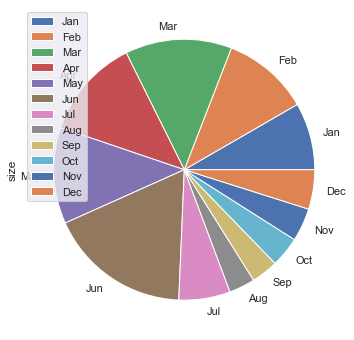

In [72]:
videos_per_month_postcovid.plot(kind='pie', y='size', labels = videos_per_month_postcovid['Month'])

In [73]:
! pip install google.colab

     ---------------------------------------- 72.9/72.9 KB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 64.2/64.2 KB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 104.5/104.5 KB ? eta 0:00:00
     -------------------------------------- 758.9/758.9 KB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 11.8/11.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.0/58.0 KB 3.0 MB/s eta 0:00:00
     -------------------------------------- 484.2/484.2 KB 4.3 MB/s eta 0:00:00
  Preparing

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [841 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\testing.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\_version.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-3.8\pandas
  creating build\lib.win-amd64-3.8\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-3.8\pandas\api
  creating build\lib.win-amd64-3.8\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-3.8\pandas\arrays
  creating build\lib.win-amd64-3.8\pandas\compat
  copying pandas\compat\chainmap.py -> build\lib.win-amd64-3.8\pandas\compat
  copying pandas\compat\chainmap_impl.py -> build\lib.win-amd64-3.8\pandas\compat
  copyin

  copying pandas\core\sparse\__init__.py -> build\lib.win-amd64-3.8\pandas\core\sparse
  creating build\lib.win-amd64-3.8\pandas\core\tools
  copying pandas\core\tools\datetimes.py -> build\lib.win-amd64-3.8\pandas\core\tools
  copying pandas\core\tools\numeric.py -> build\lib.win-amd64-3.8\pandas\core\tools
  copying pandas\core\tools\timedeltas.py -> build\lib.win-amd64-3.8\pandas\core\tools
  copying pandas\core\tools\__init__.py -> build\lib.win-amd64-3.8\pandas\core\tools
  creating build\lib.win-amd64-3.8\pandas\core\util
  copying pandas\core\util\hashing.py -> build\lib.win-amd64-3.8\pandas\core\util
  copying pandas\core\util\__init__.py -> build\lib.win-amd64-3.8\pandas\core\util
  creating build\lib.win-amd64-3.8\pandas\io\clipboard
  copying pandas\io\clipboard\clipboards.py -> build\lib.win-amd64-3.8\pandas\io\clipboard
  copying pandas\io\clipboard\exceptions.py -> build\lib.win-amd64-3.8\pandas\io\clipboard
  copying pandas\io\clipboard\windows.py -> build\lib.win-amd64-

In [74]:
from google.colab import drive
drive.mount('/content/gdrive/') # mount google drive
!ls -ltr /content/gdrive/MyDrive/Colab\ Notebooks
video_df.to_csv("/content/gdrive/MyDrive/youtube_project_dataset.csv", sep='\t', encoding='utf-8')

  copying pandas\tests\frame\test_constructors.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_convert_to.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_dtypes.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_duplicates.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_indexing.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_join.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_missing.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_mutate_columns.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_nonunique_indexes.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_operators.py -> build\lib.win-amd64-3.8\pandas\tests\frame
  copying pandas\tests\frame\test_period.py -> build\lib.win-am

ModuleNotFoundError: No module named 'google.colab'